In [34]:
from src.Prep import *
from src.Model import *
import warnings
warnings.filterwarnings('ignore')

In [30]:
from pytictoc import TicToc
t = TicToc() #create instance of class

In [13]:
%load_ext autoreload
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [147]:
%autoreload

In [5]:
df = Prep(files).compile()

------------------------------------PREP------------------------------------
 1 of 11 |    Reading in data 
         |    Filtering to 4 features:
         |       Date, System Size, Total Cost, Customer Segment 
         |    Changing -9999 values to null
 2 of 11 |    Cleaning up column names
 3 of 11 |    Refining to only RES Customer Segment
 4 of 11 |    Sorting values by installation_date
         |    Assigning installation_date as index
 5 of 11 |    Replacing all null values with median values from same year
 6 of 11 |    Adusting prices for inflation
 7 of 11 |    Creating target variable: cost_per_watt
 8 of 11 |    Resampling data into weekly medians
         |    Cropping dataframe to keep only continuous non-null data
 9 of 11 |    Testing for stationarity
         |       ADF P-value: 0.9588 
         |       Time Series is not stationary.   
         |       Fail to reject ADF H0
10 of 11 |    Creating differenced data to achieve stationarity
11 of 11 |    Testing for s

Auto or Manual?:


 auto


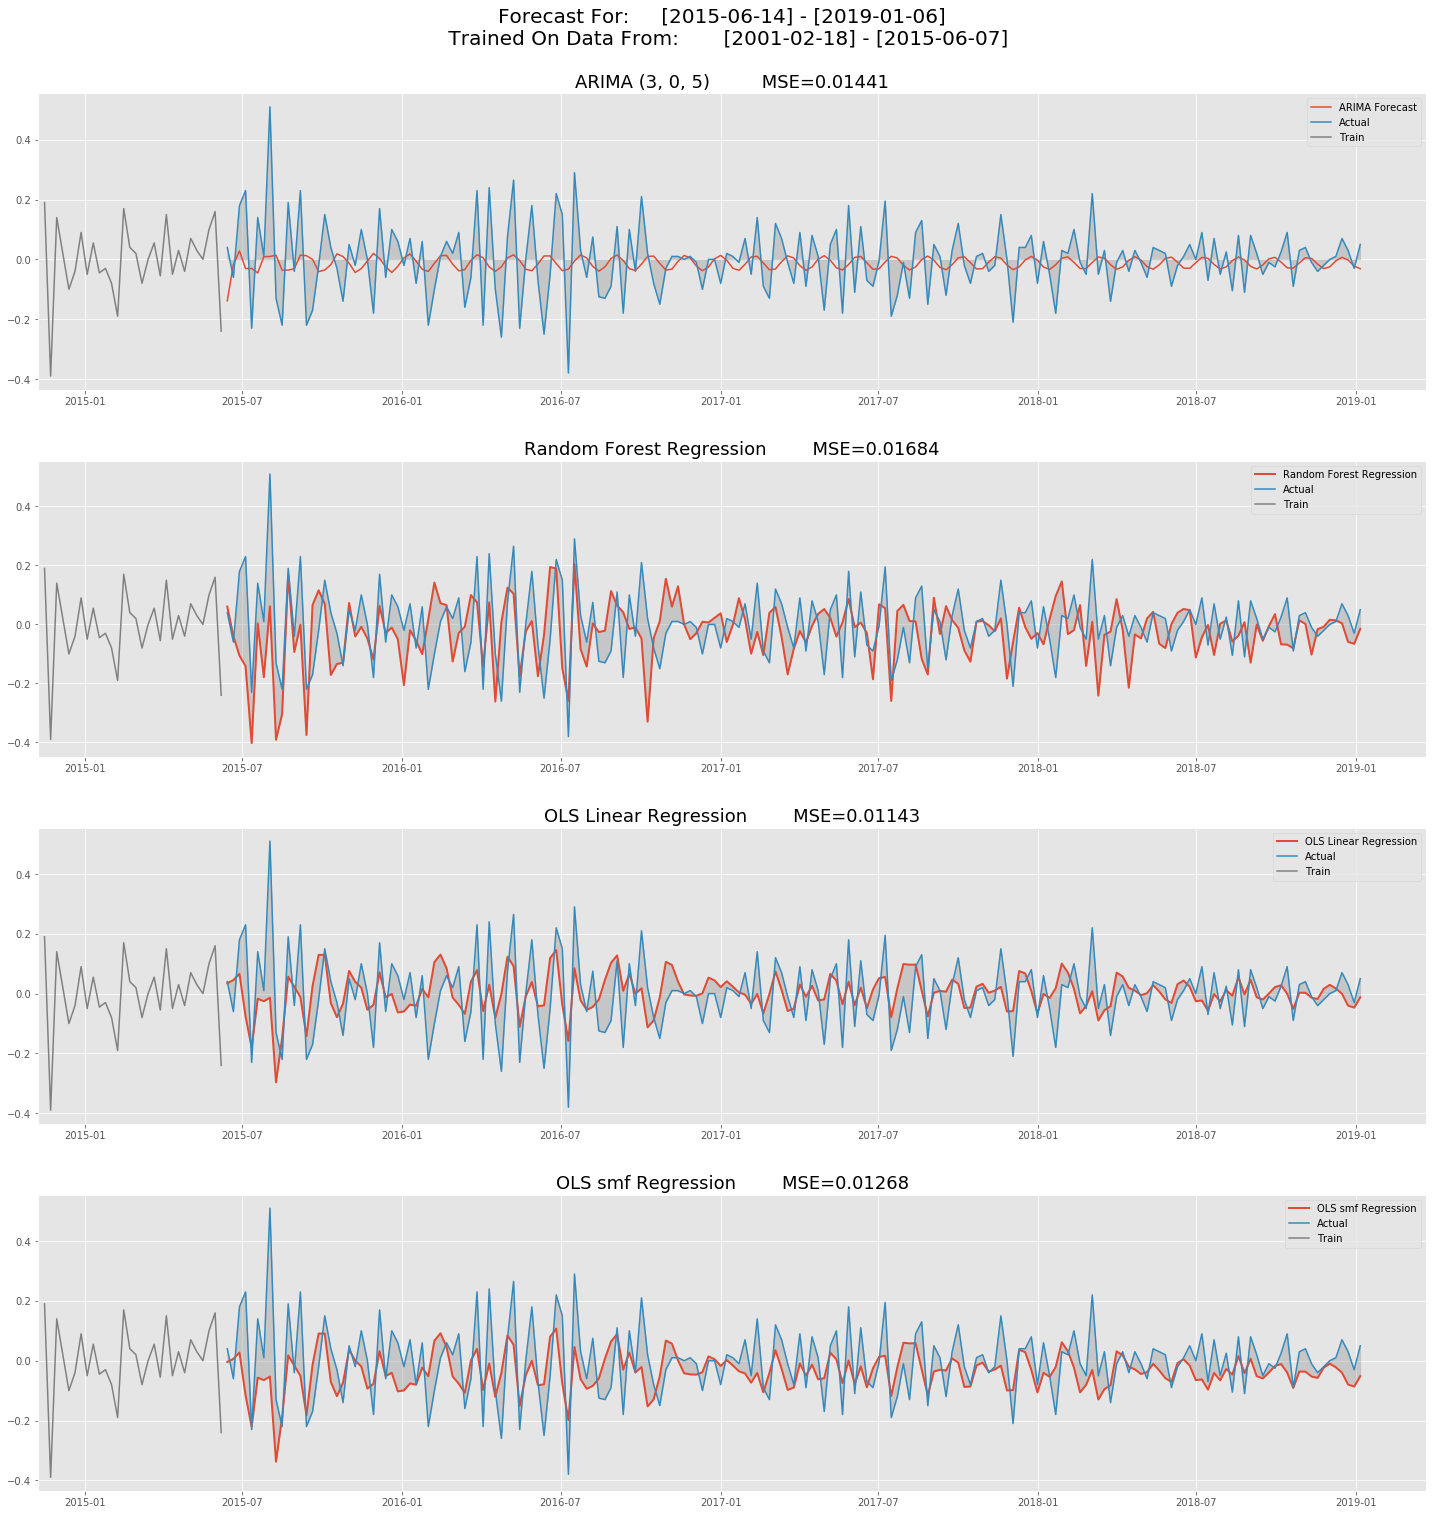

In [141]:
Models(find_order=True).show_models(df)

Would you like to use a specific order? (Y/N)


 N


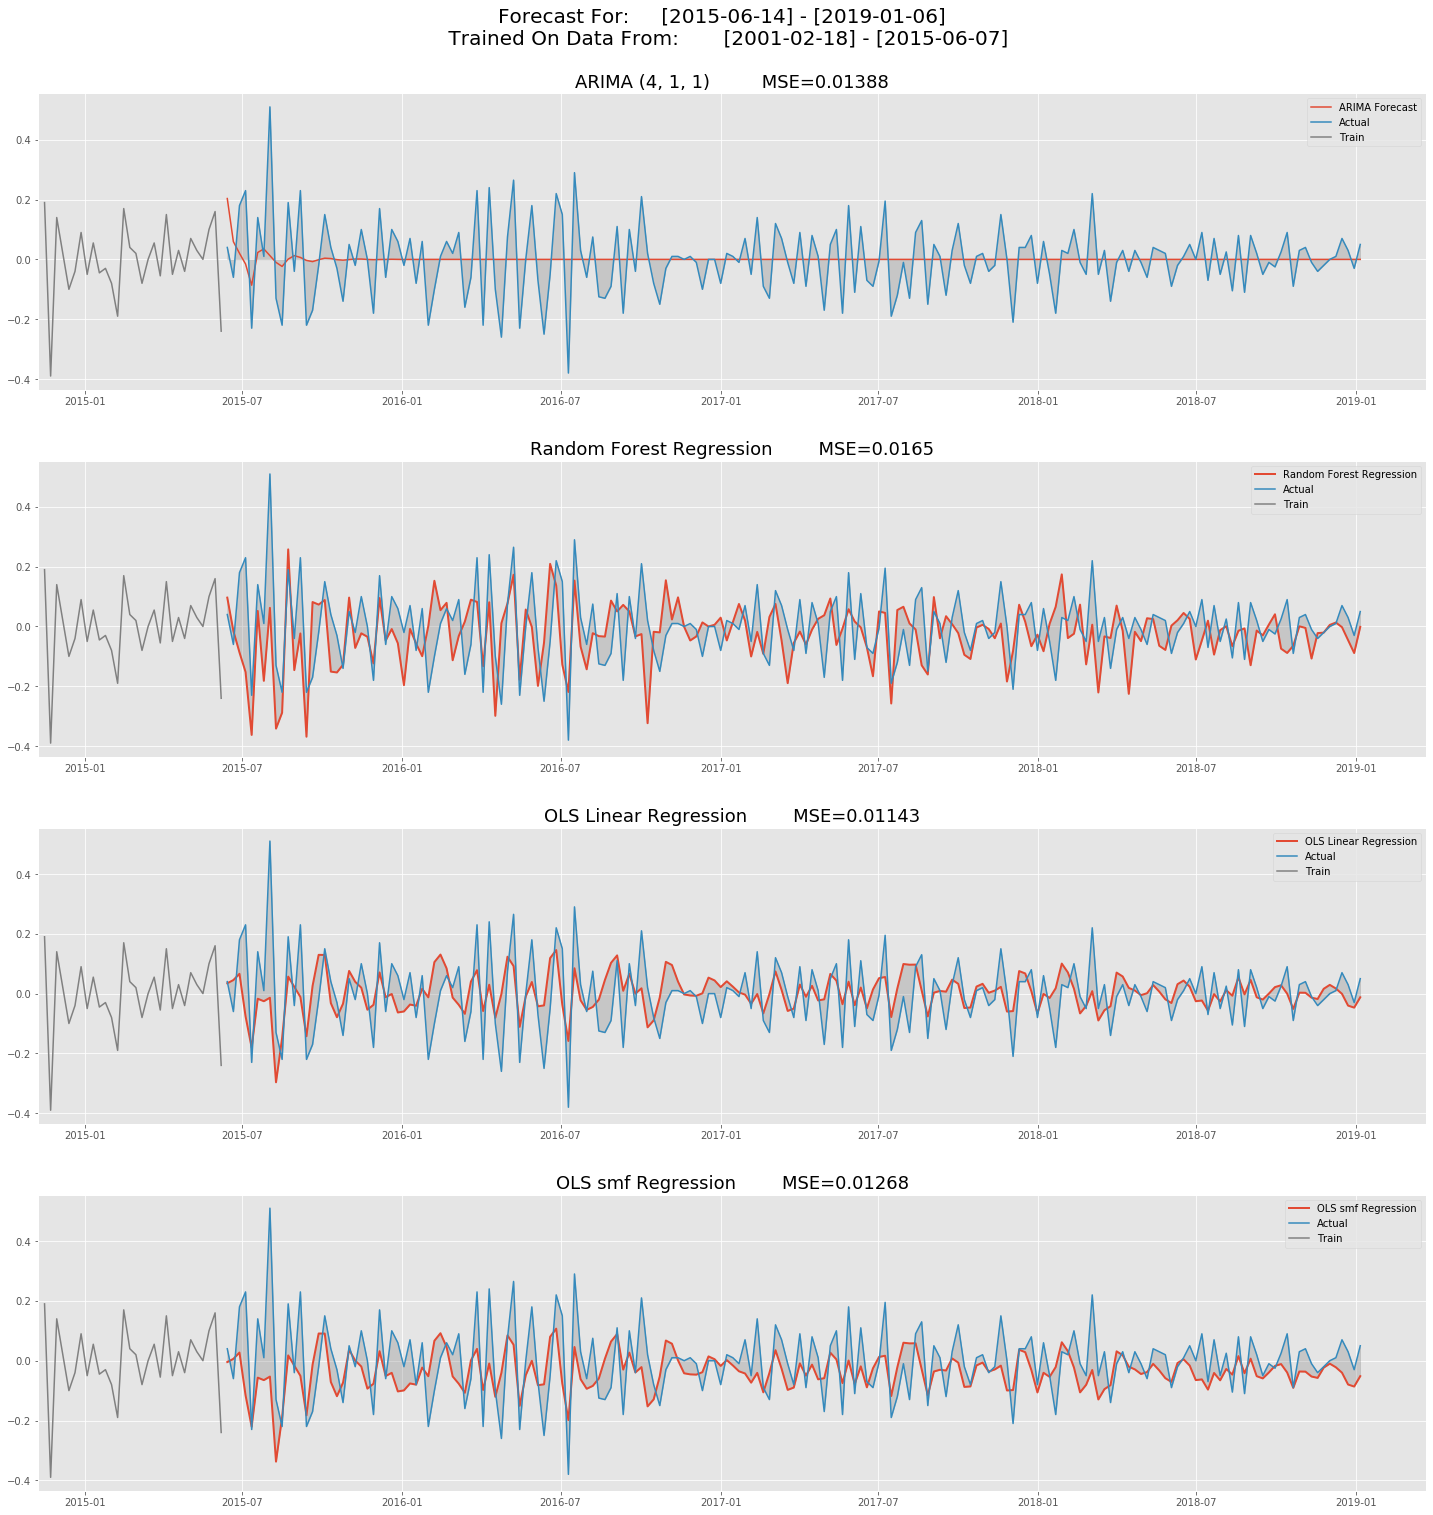

In [142]:
Models(find_order=False).show_models(df)

Would you like to use a specific order? (Y/N)


 Y
p: 4
d: 0
q: 0


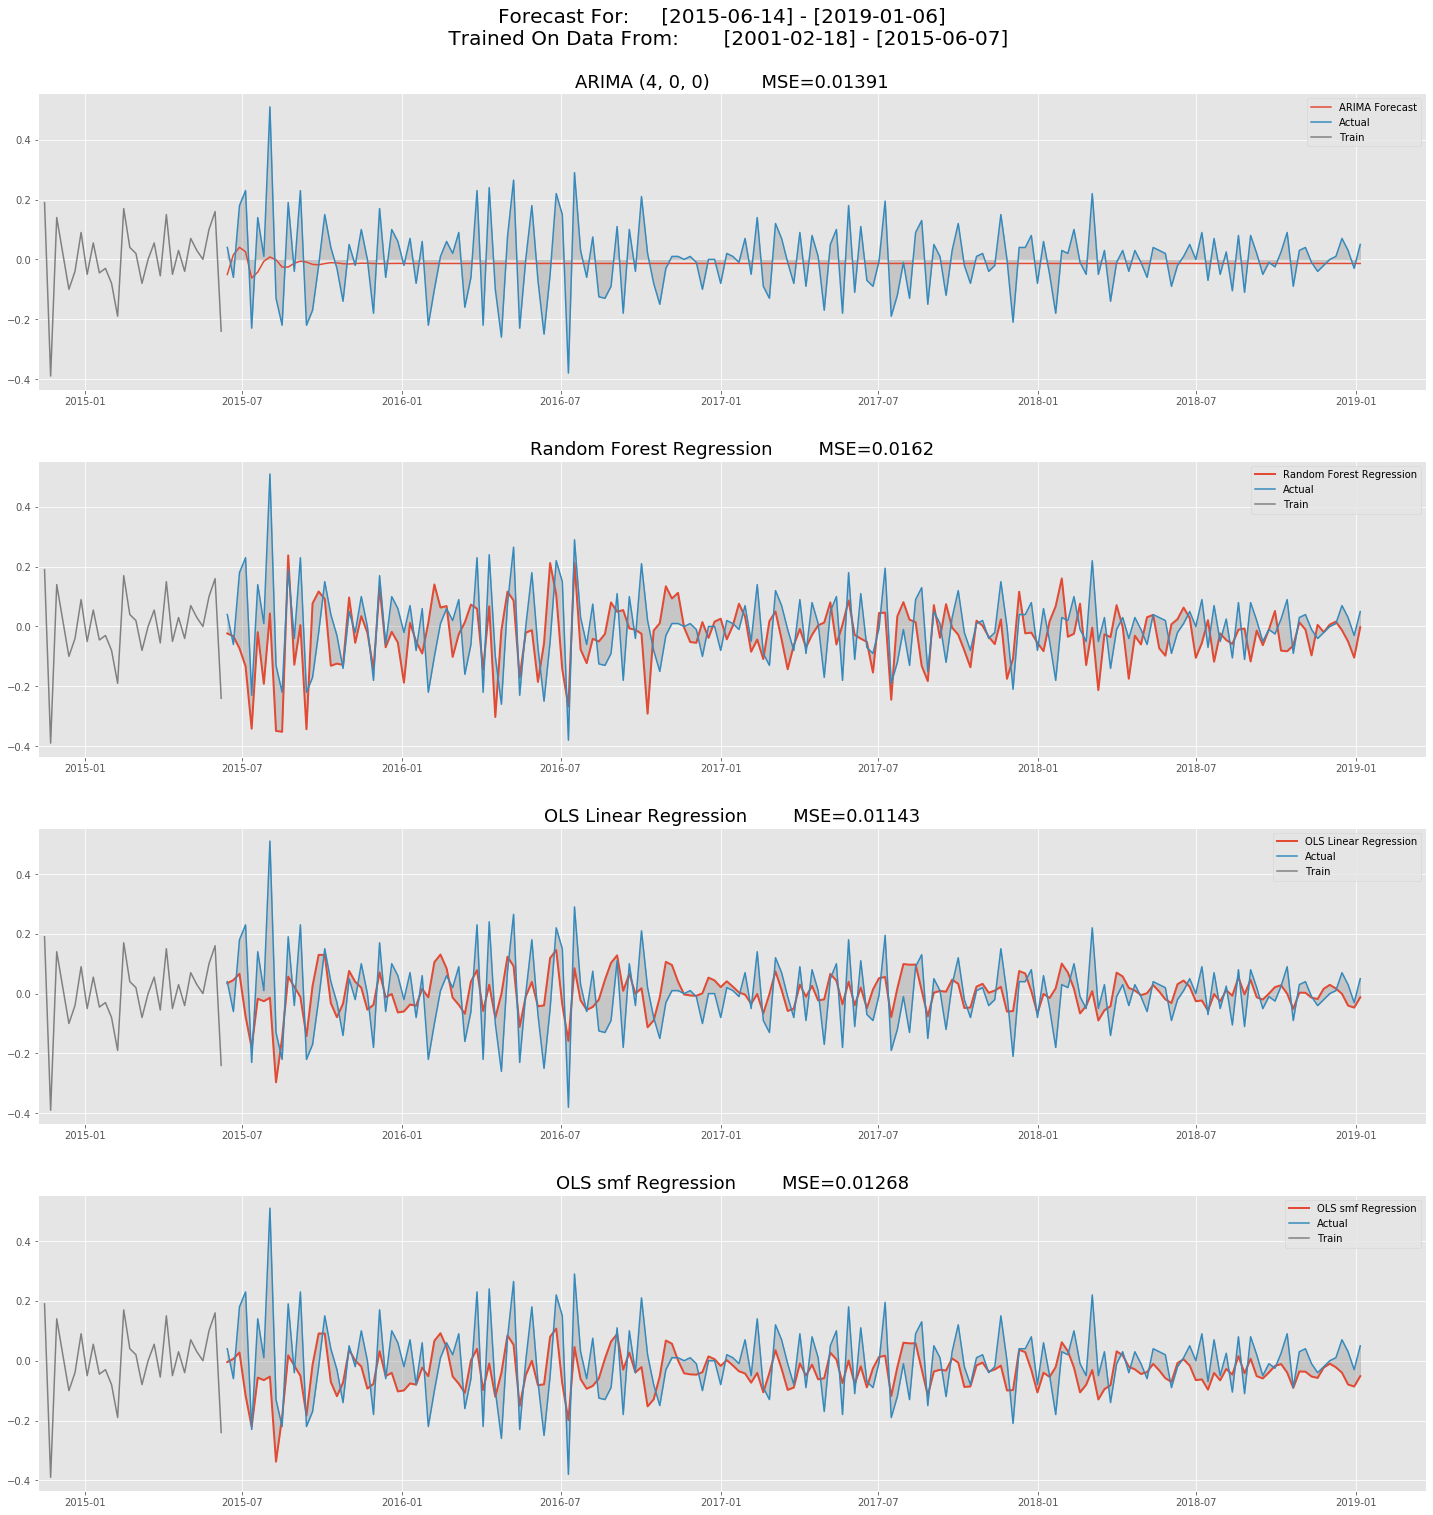

In [143]:
Models(find_order=False).show_models(df)

Auto or Manual?:


 Manual


(3, 1, 1)


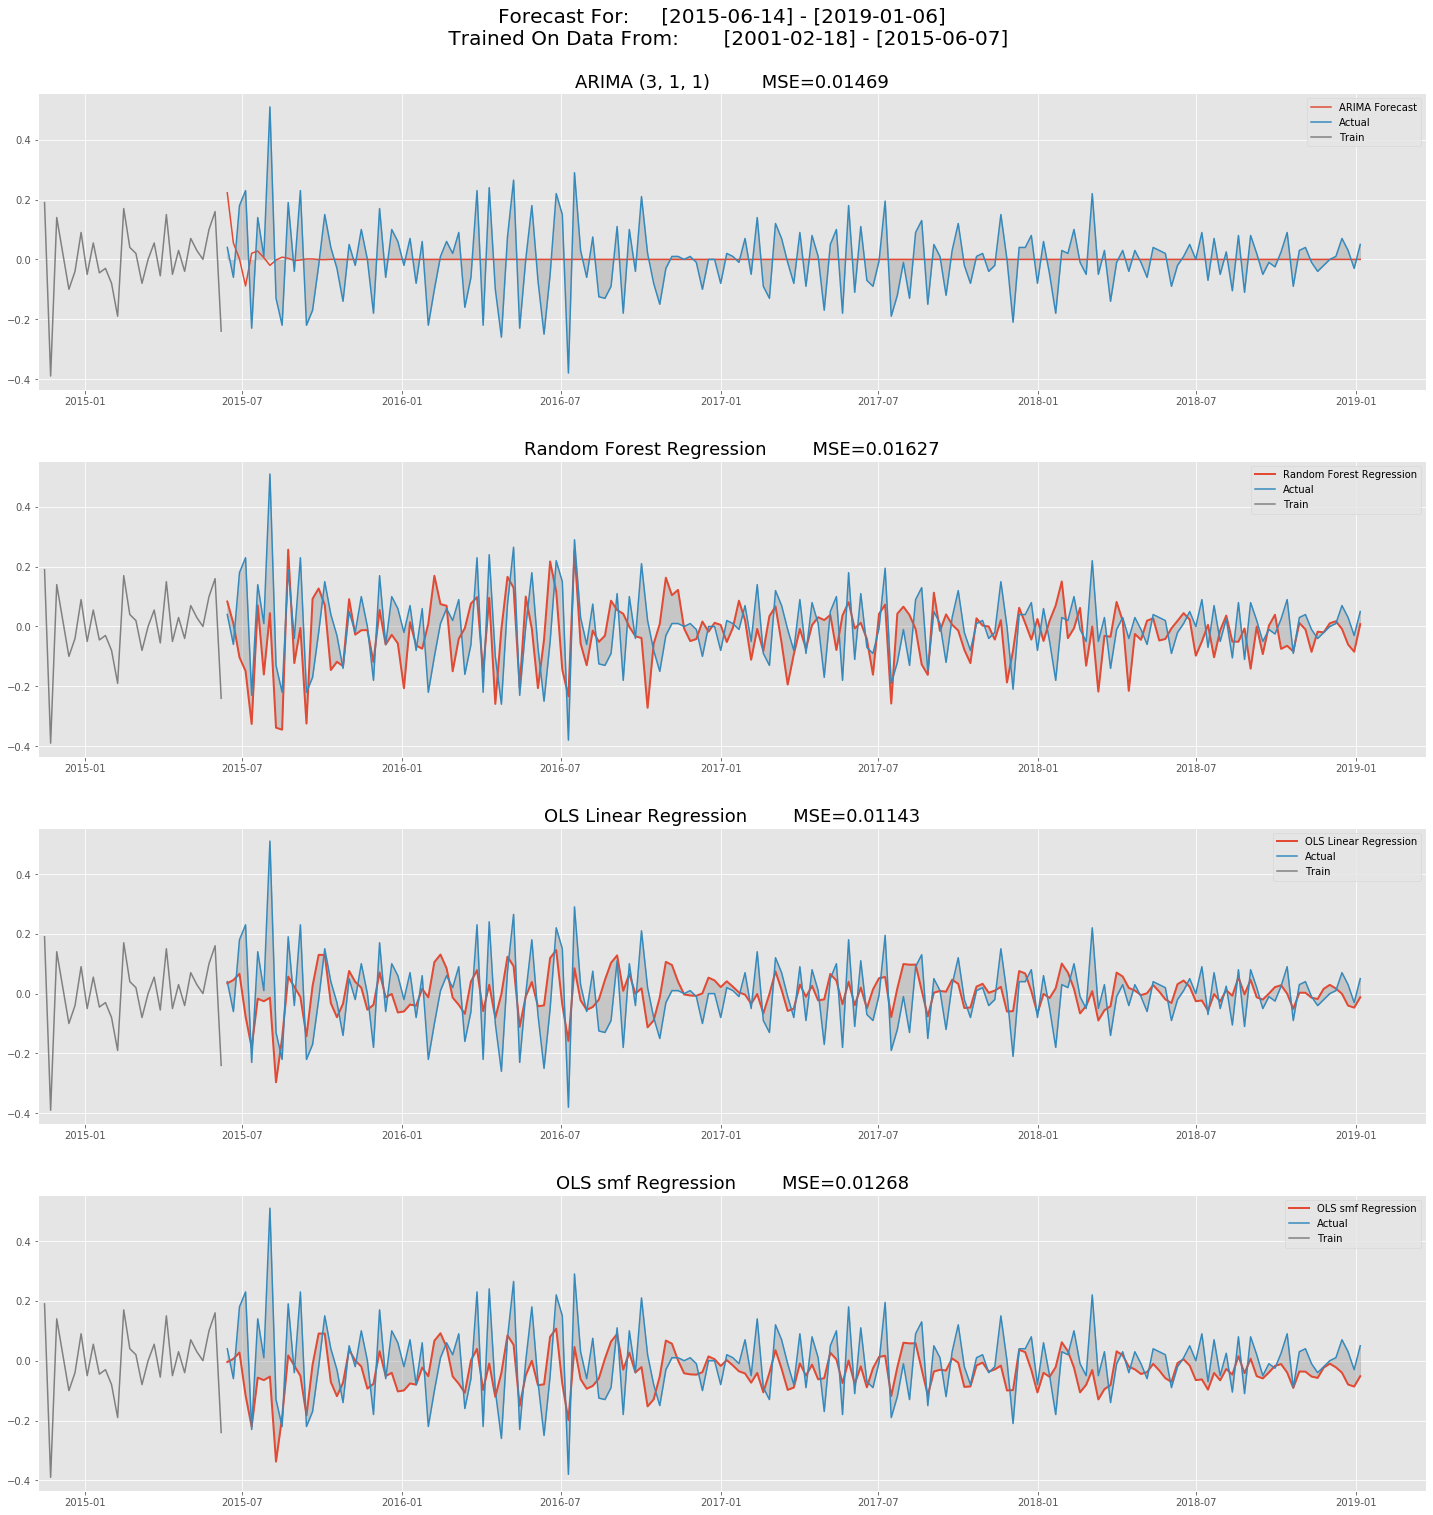

Elapsed time is 1754.842325 seconds.


In [144]:
t.tic()
Models(find_order=True).show_models(df)
t.toc()

In [152]:
%autoreload

In [ ]:
t.tic()
Models(find_order=True).show_models(df)
t.toc()

Auto or Manual?:


 manual


Please hold


In [ ]:
arima_mod = Models(find_order=False).ARIMA_predict(df)[0]

In [ ]:
from scipy import stats
from scipy.stats import normaltest

arima_mod = sm.tsa.ARIMA(train_df.sales, (6,1,0)).fit(disp=False)
resid = arima_mod.resid
print(normaltest(resid))
# returns a 2-tuple of the chi-squared statistic, and the associated p-value. the p-value is very small, meaning
# the residual is not a normal distribution

fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)

sns.distplot(resid ,fit = stats.norm, ax = ax0) # need to import scipy.stats

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(resid)

#Now plot the distribution using 
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Residual distribution')
